In [ ]:
import yfinance as yahooFinance
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
from scipy import stats
%matplotlib inline

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
start = "2007-07-01"
end = '2023-11-30'

In [ ]:
WTI = yahooFinance.download('CL=F', start=start, end=end)['Adj Close']
BRENT = yahooFinance.download('BZ=F', start=start, end=end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# remove negative drop happened during covid
WTI = WTI[WTI >= 0]
BRENT = BRENT[BRENT >= 0]

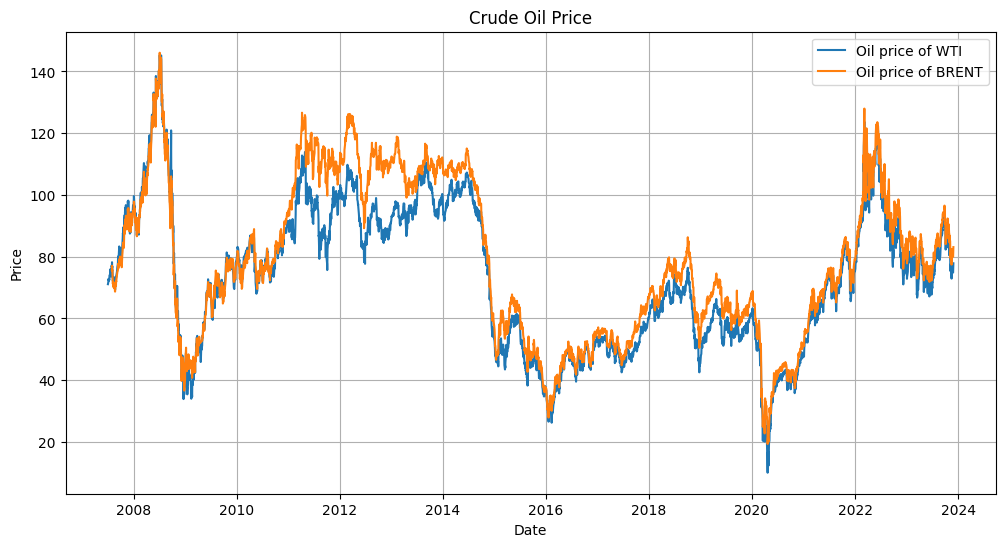

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(WTI, label='Oil price of WTI')
plt.plot(BRENT, label='Oil price of BRENT')
plt.title('Crude Oil Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
WTI_returns = WTI.pct_change().dropna()
BRENT_returns = BRENT.pct_change().dropna()

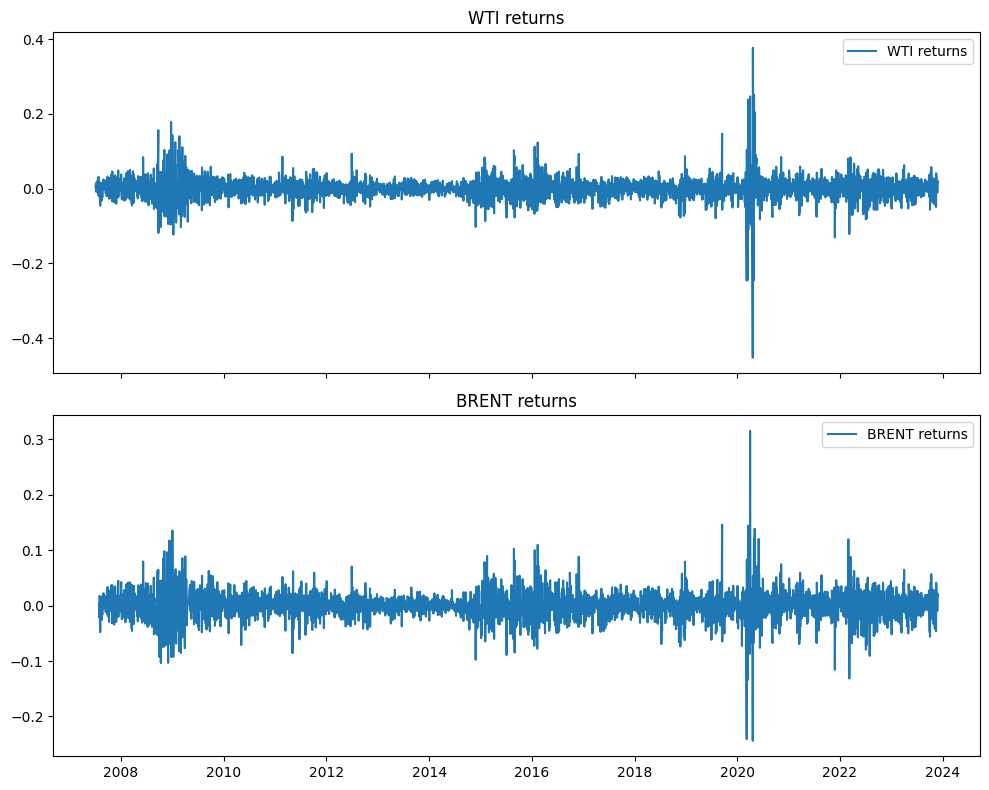

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

axs[0].plot(WTI_returns , label='WTI returns')
axs[0].set_title('WTI returns')
axs[0].legend()

axs[1].plot(BRENT_returns, label='BRENT returns')
axs[1].set_title('BRENT returns')
axs[1].legend()

plt.tight_layout()
plt.show()

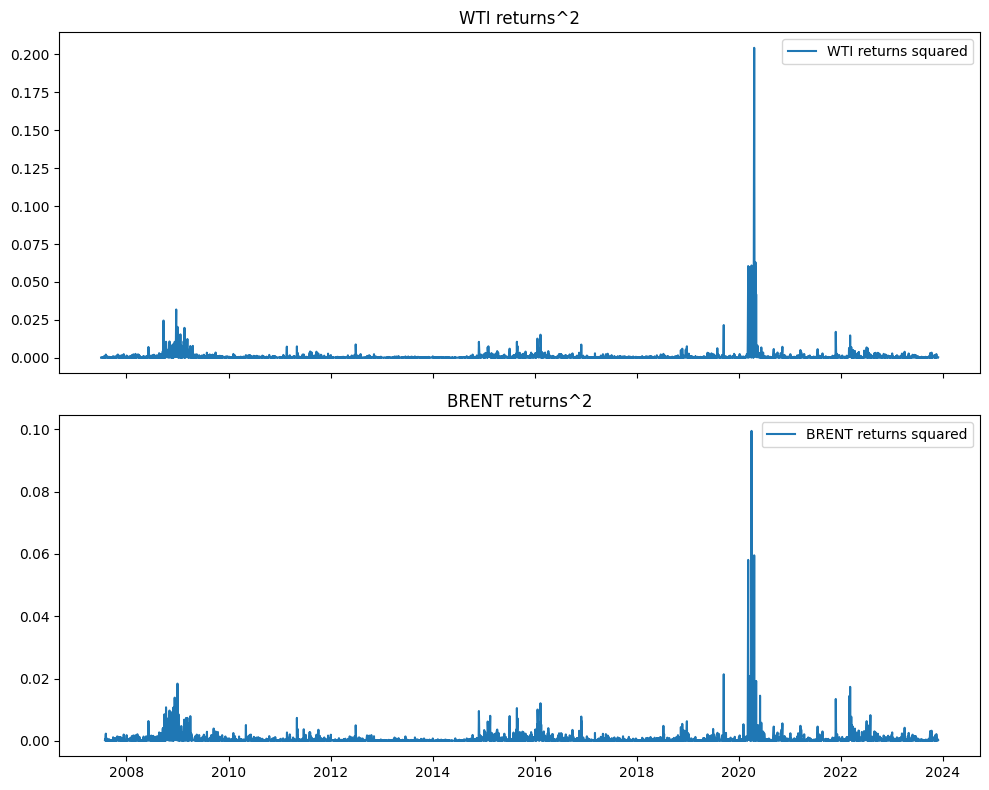

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

axs[0].plot(WTI_returns**2 , label='WTI returns squared')
axs[0].set_title('WTI returns^2')
axs[0].legend()

axs[1].plot(BRENT_returns**2, label='BRENT returns squared')
axs[1].set_title('BRENT returns^2')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
WTI_mu, WTI_std = WTI_returns.mean(), WTI_returns.std()
WTI_x = np.linspace(WTI_mu - 5*WTI_std, WTI_mu + 5*WTI_std, 100) #more std, more length

BRENT_mu, BRENT_std = BRENT_returns.mean(), BRENT_returns.std()
BRENT_x = np.linspace(BRENT_mu - 5*BRENT_std, BRENT_mu + 5*BRENT_std, 100)

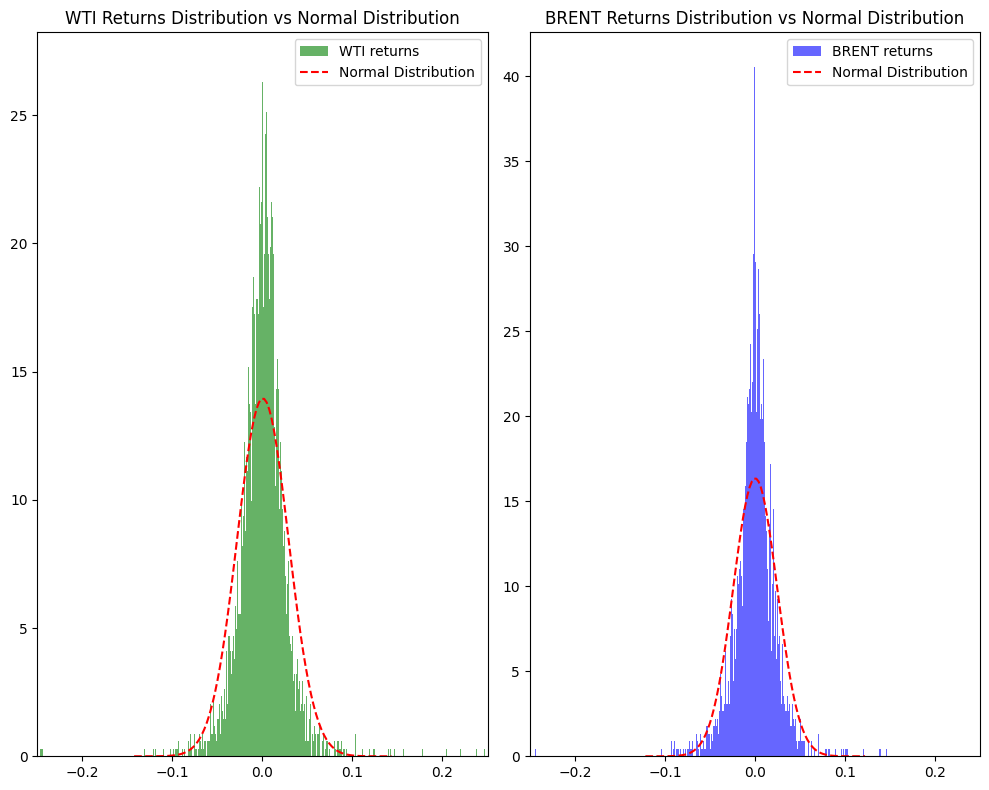

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8), sharex=True)

axs[0].hist(WTI_returns, bins=1000, density=True, alpha=0.6, color='green',label='WTI returns')
axs[0].plot(WTI_x, norm.pdf(WTI_x, WTI_mu, WTI_std), 'r--', label='Normal Distribution')
axs[0].set_title('WTI Returns Distribution vs Normal Distribution')
axs[0].set_xlim(-0.25, 0.25)
axs[0].legend()

axs[1].hist(BRENT_returns, bins=1000, density=True, alpha=0.6, color='blue',label='BRENT returns')
axs[1].plot(BRENT_x, norm.pdf(BRENT_x, BRENT_mu, BRENT_std), 'r--', label='Normal Distribution')
axs[1].set_title('BRENT Returns Distribution vs Normal Distribution')
axs[1].set_xlim(-0.25, 0.25)
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
WTI_split_index = int(len(WTI_returns) * 0.75)
WTI_estimation_set = WTI_returns[:WTI_split_index]
WTI_forecast_set = WTI_returns[WTI_split_index:]

BRENT_split_index = int(len(BRENT_returns) * 0.75)
BRENT_estimation_set = BRENT_returns[:BRENT_split_index]
BRENT_forecast_set = BRENT_returns[BRENT_split_index:]

In [ ]:
from scipy.stats import moment

In [ ]:
def calculate_statistics(data):
    mean = np.mean(data)
    sd = np.std(data)
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    data_max = np.max(data)
    data_min = np.min(data)
    JB = stats.jarque_bera(data)
    LB_Q = sm.stats.acorr_ljungbox(data,lags=10)
    ADF = adfuller(data)

    return mean, sd, skewness, kurtosis, data_max, data_min, JB, LB_Q, ADF

WTI_estimation_stats = calculate_statistics(WTI_estimation_set)
WTI_forecast_stats = calculate_statistics(WTI_forecast_set)

BRENT_estimation_stats = calculate_statistics(BRENT_estimation_set)

BRENT_forecast_stats = calculate_statistics(BRENT_forecast_set)

In [ ]:
print("WTI Estimation Set Statistics:")
print("Mean:", WTI_estimation_stats[0])
print("Standard Deviation:", WTI_estimation_stats[1])
print("Skewness:", WTI_estimation_stats[2])
print("Excess Kurtosis:", WTI_estimation_stats[3])
print("Max:", WTI_estimation_stats[4])
print("Min:", WTI_estimation_stats[5])
print("JB test:", WTI_estimation_stats[6])
print("LB-Q(10):", WTI_estimation_stats[7])
print("ADF:", WTI_estimation_stats[8])
print("\nWTI Forecast Set Statistics:")
print("Mean:", WTI_forecast_stats[0])
print("Standard Deviation:", WTI_forecast_stats[1])
print("Skewness:", WTI_forecast_stats[2])
print("Excess Kurtosis:", WTI_forecast_stats[3])
print("Max:", WTI_forecast_stats[4])
print("Min:", WTI_forecast_stats[5])
print("JB test:", WTI_forecast_stats[6])
print("LB-Q(10):", WTI_forecast_stats[7])
print("ADF:", WTI_forecast_stats[8])

WTI Estimation Set Statistics:
Mean: 0.0002006361742283362
Standard Deviation: 0.02406956518192629
Skewness: 0.38456426586934694
Excess Kurtosis: 5.350476010700936
Max: 0.1783289372897312
Min: -0.12247839725555387
JB test: SignificanceResult(statistic=3770.488103561915, pvalue=0.0)
LB-Q(10):       lb_stat  lb_pvalue
1   13.348229   0.000259
2   13.876157   0.000970
3   15.223525   0.001635
4   16.212787   0.002747
5   19.438028   0.001592
6   19.509844   0.003384
7   19.560528   0.006601
8   19.582316   0.012037
9   19.685406   0.019956
10  20.268142   0.026816
ADF: (-59.398474245440056, 0.0, 0, 3096, {'1%': -3.432463930917848, '5%': -2.8624740025026894, '10%': -2.567267192280278}, -14147.434612909561)

WTI Forecast Set Statistics:
Mean: 0.0011508116037006297
Standard Deviation: 0.03911951560348572
Skewness: -0.41050002598968854
Excess Kurtosis: 35.17462192380239
Max: 0.37662331847024166
Min: -0.45210728089346175
JB test: SignificanceResult(statistic=53282.48728460529, pvalue=0.0)
LB-Q

In [ ]:
print("BRENT Estimation Set Statistics:")
print("Mean:", BRENT_estimation_stats[0])
print("Standard Deviation:", BRENT_estimation_stats[1])
print("Skewness:", BRENT_estimation_stats[2])
print("Excess Kurtosis:", BRENT_estimation_stats[3])
print("Max:", BRENT_estimation_stats[4])
print("Min:", BRENT_estimation_stats[5])
print("JB test:", BRENT_estimation_stats[6])
print("LB-Q(10):", BRENT_estimation_stats[7])
print("ADF:", BRENT_estimation_stats[8])
print("\nBRENT Forecast Set Statistics:")
print("Mean:", BRENT_forecast_stats[0])
print("Standard Deviation:", BRENT_forecast_stats[1])
print("Skewness:", BRENT_forecast_stats[2])
print("Excess Kurtosis:", BRENT_forecast_stats[3])
print("Max:", BRENT_forecast_stats[4])
print("Min:", BRENT_forecast_stats[5])
print("JB test:", BRENT_forecast_stats[6])
print("LB-Q(10):", BRENT_forecast_stats[7])
print("ADF:", BRENT_forecast_stats[8])

BRENT Estimation Set Statistics:
Mean: 0.00017421873128526798
Standard Deviation: 0.021851431079992767
Skewness: 0.14265232474020517
Excess Kurtosis: 4.205714089763398
Max: 0.1461307745596312
Min: -0.10367779995813342
JB test: SignificanceResult(statistic=2250.7944347276043, pvalue=0.0)
LB-Q(10):       lb_stat  lb_pvalue
1   21.873689   0.000003
2   22.429398   0.000013
3   22.980823   0.000041
4   24.831802   0.000054
5   26.367622   0.000076
6   26.369123   0.000190
7   26.895708   0.000348
8   28.740230   0.000352
9   31.960133   0.000202
10  34.621042   0.000145
ADF: (-12.405629464779105, 4.4592518495742417e-23, 14, 3025, {'1%': -3.432513589345956, '5%': -2.862495935221514, '10%': -2.5672788689570383}, -14500.781116819911)

BRENT Forecast Set Statistics:
Mean: 0.0007615827737889396
Standard Deviation: 0.030779548879117945
Skewness: 0.12673887181298255
Excess Kurtosis: 20.240228868387643
Max: 0.3154657395857383
Min: -0.2440359736250306
JB test: SignificanceResult(statistic=17311.139

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.style.use('seaborn')


<ipython-input-30-f44693343e8a>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


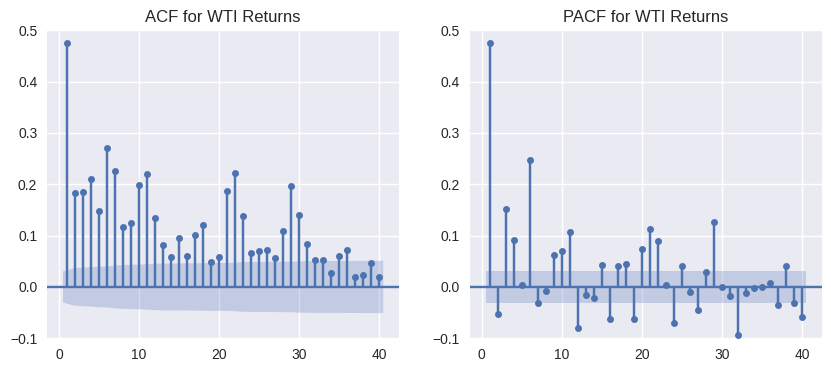

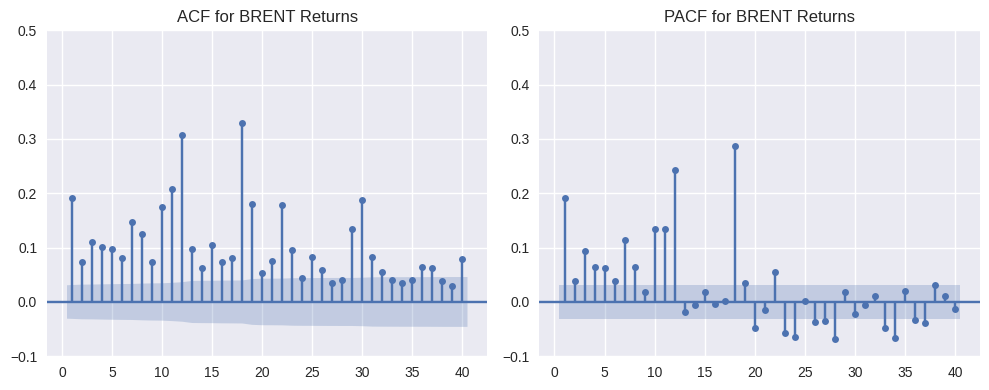

In [ ]:
fig, axs_acf_pacf_WTI = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

plot_acf(WTI_returns**2, lags=40, ax=axs_acf_pacf_WTI[0], zero=False)
axs_acf_pacf_WTI[0].set_title('ACF for WTI Returns')
axs_acf_pacf_WTI[0].set_ylim(-0.1, 0.5)

plot_pacf(WTI_returns**2, lags=40, ax=axs_acf_pacf_WTI[1], zero=False)
axs_acf_pacf_WTI[1].set_title('PACF for WTI Returns')
axs_acf_pacf_WTI[1].set_ylim(-0.1, 0.5)


fig, axs_acf_pacf_BRENT = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

plot_acf(BRENT_returns**2, lags=40, ax=axs_acf_pacf_BRENT[0], zero=False)
axs_acf_pacf_BRENT[0].set_title('ACF for BRENT Returns')
axs_acf_pacf_BRENT[0].set_ylim(-0.1, 0.5)

plot_pacf(BRENT_returns**2, lags=40, ax=axs_acf_pacf_BRENT[1], zero=False)
axs_acf_pacf_BRENT[1].set_title('PACF for BRENT Returns')
axs_acf_pacf_BRENT[1].set_ylim(-0.1, 0.5)

plt.tight_layout()
plt.show()


In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 16.2 MB/s eta 0:00:00


In [ ]:
from arch import arch_model

In [ ]:
model_WTI_est = arch_model(WTI_estimation_set, vol='GARCH', p=1, o=1, q=1,power=1.0, dist='ged')
result_WTI_est = model_WTI_est.fit(disp='off')

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005793. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:1194: RuntimeWarning: overflow encountered in power
  lls -= 0.5 * abs(resids / (sqrt(sigma2) * c)) ** nu


In [ ]:
model_BRENT_est = arch_model(BRENT_estimation_set, vol='GARCH',p=1, q=1,  dist='ged')
result_BRENT_est = model_BRENT_est.fit(disp='off')

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004775. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:1194: RuntimeWarning: overflow encountered in power
  lls -= 0.5 * abs(resids / (sqrt(sigma2) * c)) ** nu


GARCH(1,1) with GED distribution for BRENT oil:
                           Constant Mean - GARCH Model Results                            
Dep. Variable:                          Adj Close   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                  GARCH   Log-Likelihood:                7691.26
Distribution:      Generalized Error Distribution   AIC:                          -15372.5
Method:                        Maximum Likelihood   BIC:                          -15342.4
                                                    No. Observations:                 3040
Date:                            Fri, Dec 01 2023   Df Residuals:                     3039
Time:                                    20:11:45   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t| 

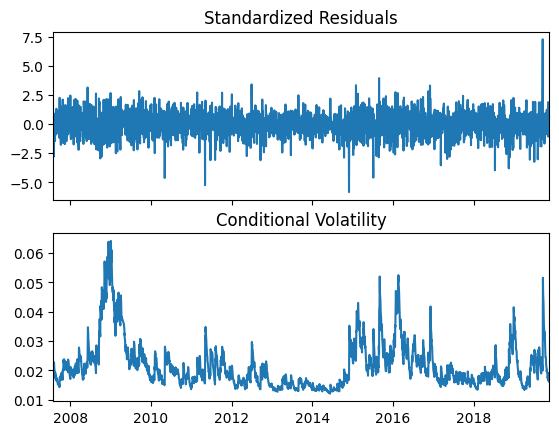

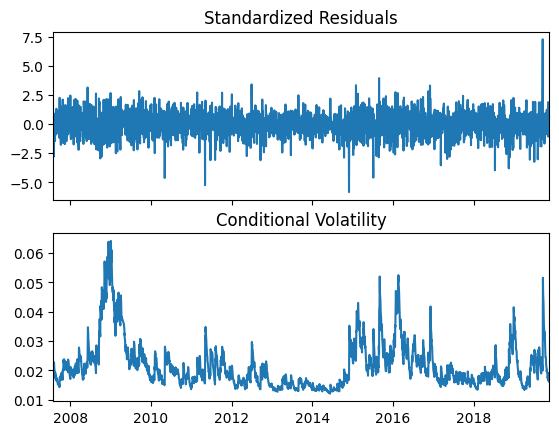

In [ ]:
print("GARCH(1,1) with GED distribution for BRENT oil:")
print(result_BRENT_est.summary())
result_BRENT_est.plot()

TGARCH(1,1) with GED distribution for WTI oil:
                        Constant Mean - TARCH/ZARCH Model Results                         
Dep. Variable:                          Adj Close   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            TARCH/ZARCH   Log-Likelihood:                5067.19
Distribution:      Generalized Error Distribution   AIC:                          -10122.4
Method:                        Maximum Likelihood   BIC:                          -10086.1
                                                    No. Observations:                 3097
Date:                            Fri, Dec 01 2023   Df Residuals:                     3096
Time:                                    20:11:43   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|   

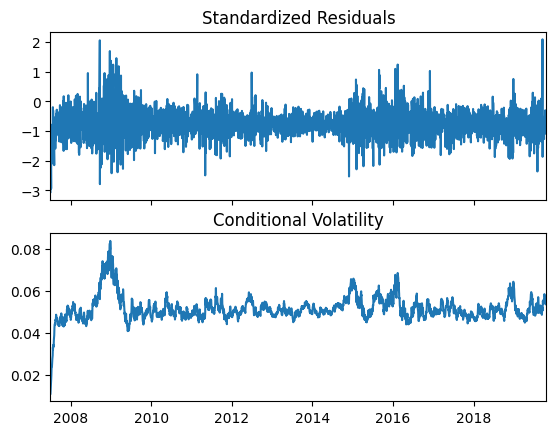

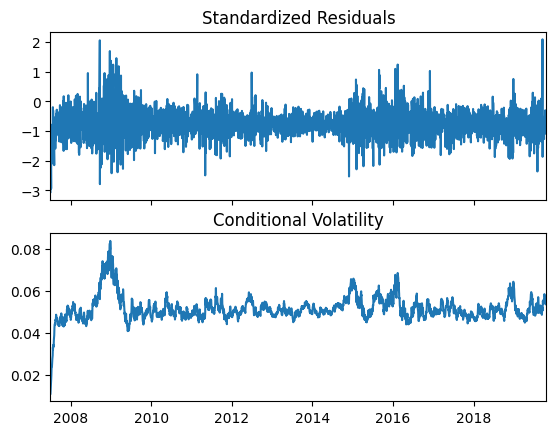

In [ ]:
print("TGARCH(1,1) with GED distribution for WTI oil:")
print(result_WTI_est.summary())
result_WTI_est.plot()

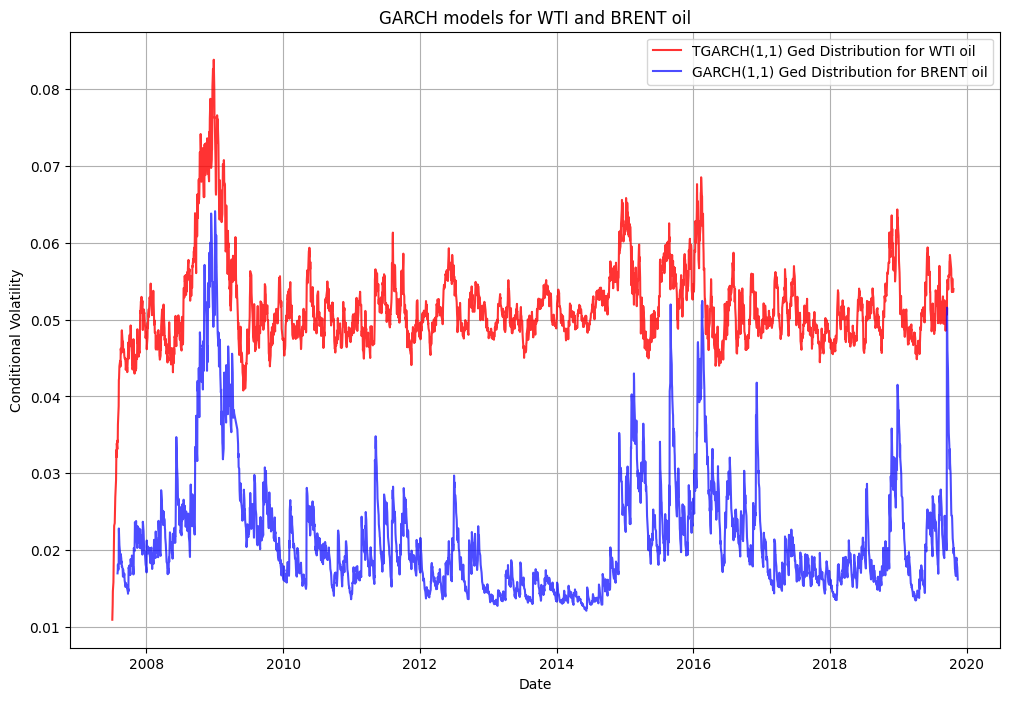

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(result_WTI_est.conditional_volatility.index, result_WTI_est.conditional_volatility, color='red',alpha=0.8, label='TGARCH(1,1) Ged Distribution for WTI oil')
plt.plot(result_BRENT_est.conditional_volatility.index, result_BRENT_est.conditional_volatility, color='blue',alpha=0.7, label='GARCH(1,1) Ged Distribution for BRENT oil')
plt.title('GARCH models for WTI and BRENT oil')
plt.xlabel('Date')
plt.ylabel('Conditional Volatility')
plt.grid(True)
plt.legend()
plt.show()

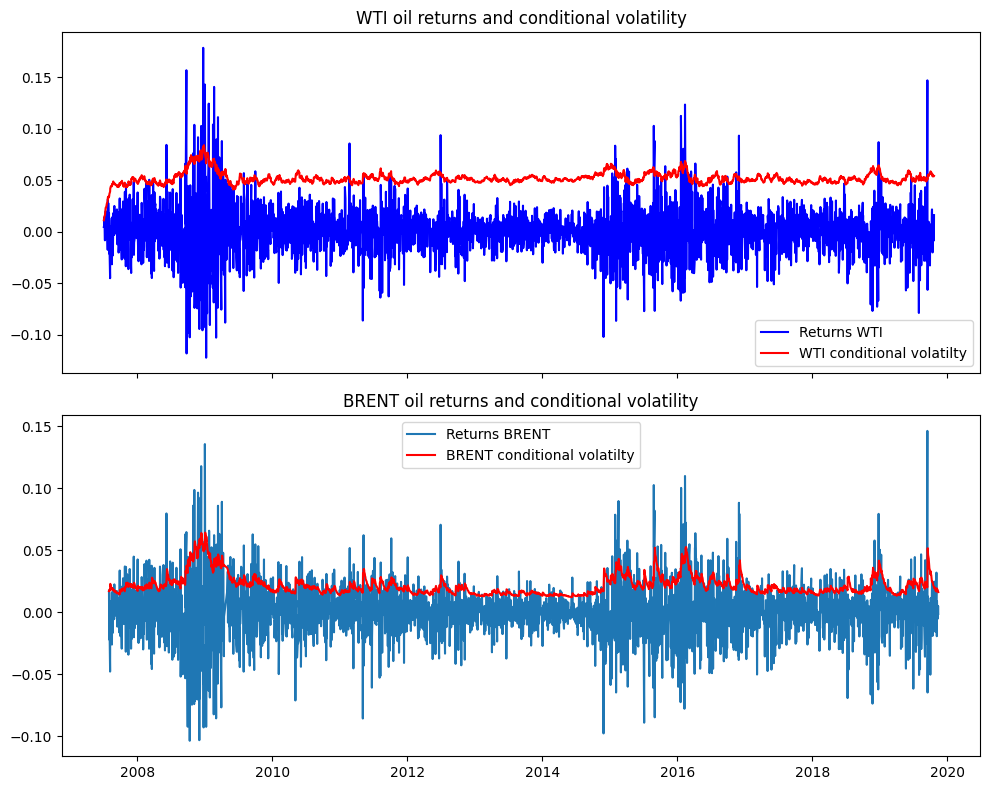

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

axs[0].plot(WTI_estimation_set, label='Returns WTI', color='blue')
axs[0].plot(result_WTI_est.conditional_volatility, label='WTI conditional volatilty',  color='red')
axs[0].set_title('WTI oil returns and conditional volatility')
axs[0].legend()

axs[1].plot(BRENT_estimation_set, label='Returns BRENT')
axs[1].plot(result_BRENT_est.conditional_volatility, label='BRENT conditional volatilty', color='red')
axs[1].set_title('BRENT oil returns and conditional volatility')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
WTI_result_mu, WTI_result_std = result_WTI_est.std_resid.mean(), result_WTI_est.std_resid.std()
WTI_result_x = np.linspace(WTI_result_mu - 5*WTI_result_std, WTI_result_mu + 5*WTI_result_std, 100) #more std, more length

BRENT_result_mu, BRENT_result_std = result_BRENT_est.std_resid.mean(), result_BRENT_est.std_resid.std()
BRENT_result_x = np.linspace(BRENT_result_mu - 5*BRENT_result_std, BRENT_result_mu + 5*BRENT_result_std, 100)

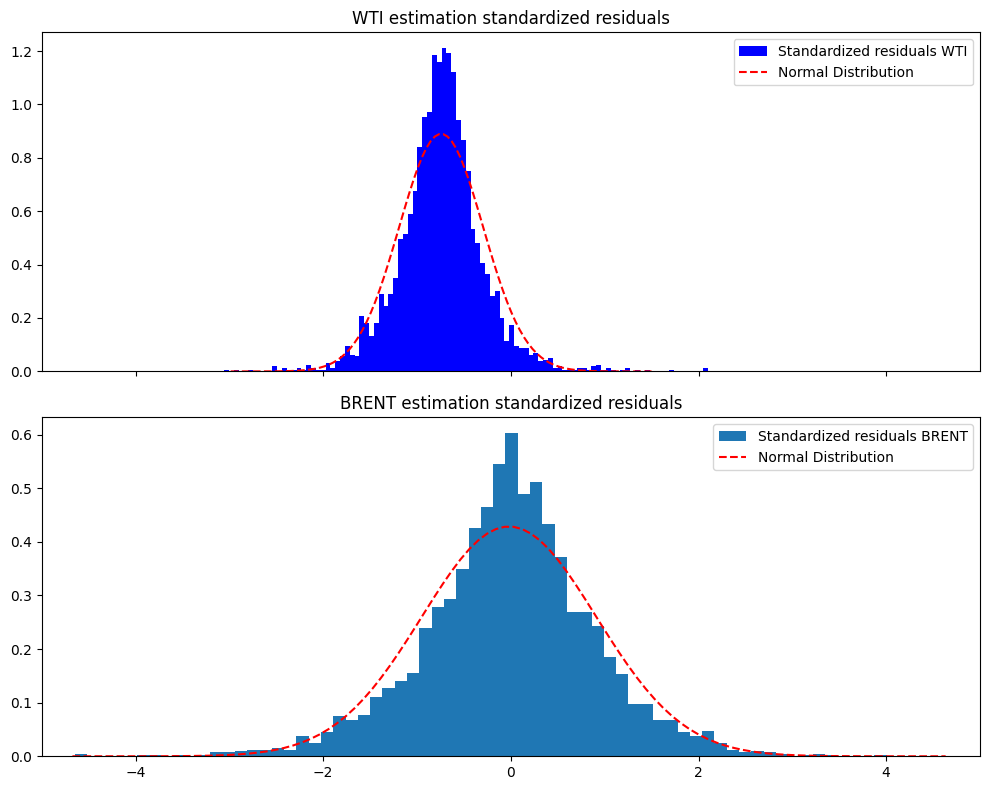

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

axs[0].hist(result_WTI_est.std_resid, label='Standardized residuals WTI', color='blue', bins=100, density=True)
axs[0].plot(WTI_result_x, norm.pdf(WTI_result_x, WTI_result_mu, WTI_result_std), 'r--', label='Normal Distribution')
axs[0].set_title('WTI estimation standardized residuals')
axs[0].set_xlim(-5, 5)
axs[0].legend()

axs[1].hist(result_BRENT_est.std_resid, label='Standardized residuals BRENT', bins=100, density=True)
axs[1].plot(BRENT_result_x, norm.pdf(BRENT_result_x, BRENT_result_mu, BRENT_result_std), 'r--', label='Normal Distribution')
axs[1].set_title('BRENT estimation standardized residuals')
axs[1].legend()

plt.tight_layout()
plt.show()

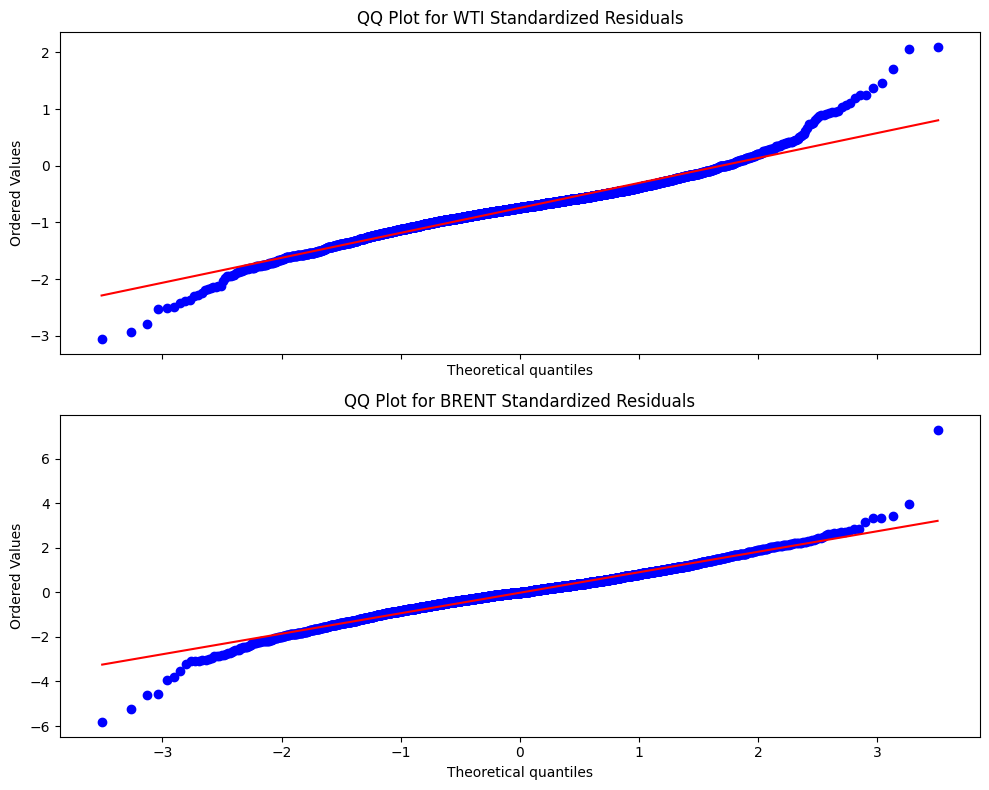

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

stats.probplot(result_WTI_est.std_resid, dist='norm', plot=axs[0])
axs[0].set_title('QQ Plot for WTI Standardized Residuals')


stats.probplot(result_BRENT_est.std_resid, dist='norm', plot=axs[1])
axs[1].set_title('QQ Plot for BRENT Standardized Residuals')


plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
q_wti = 2.493196
q_brent = 2.295304

shape_param_wti = 1.5115
shape_param_brent = 2.1167

data = {
    'Parameter': ['Shape Parameter', '99% Quantile'],
    'WTI Returns': [shape_param_wti, q_wti],
    'BRENT Returns': [shape_param_brent, q_brent]
}

df = pd.DataFrame(data)
df.set_index('Parameter', inplace=True)

print(df)

                 WTI Returns  BRENT Returns
Parameter                                  
Shape Parameter       1.5115         2.1167
99% Quantile          2.5780         2.5480


In [ ]:
window_size = 30

rolling_var_upside_wti = WTI_estimation_set.rolling(window=window_size).quantile(1 - 1/100)
rolling_var_downside_wti = WTI_estimation_set.rolling(window=window_size).quantile(1/100)

rolling_var_upside_brent = BRENT_estimation_set.rolling(window=window_size).quantile(1 - 1/100)
rolling_var_downside_brent = BRENT_estimation_set.rolling(window=window_size).quantile(1/100)

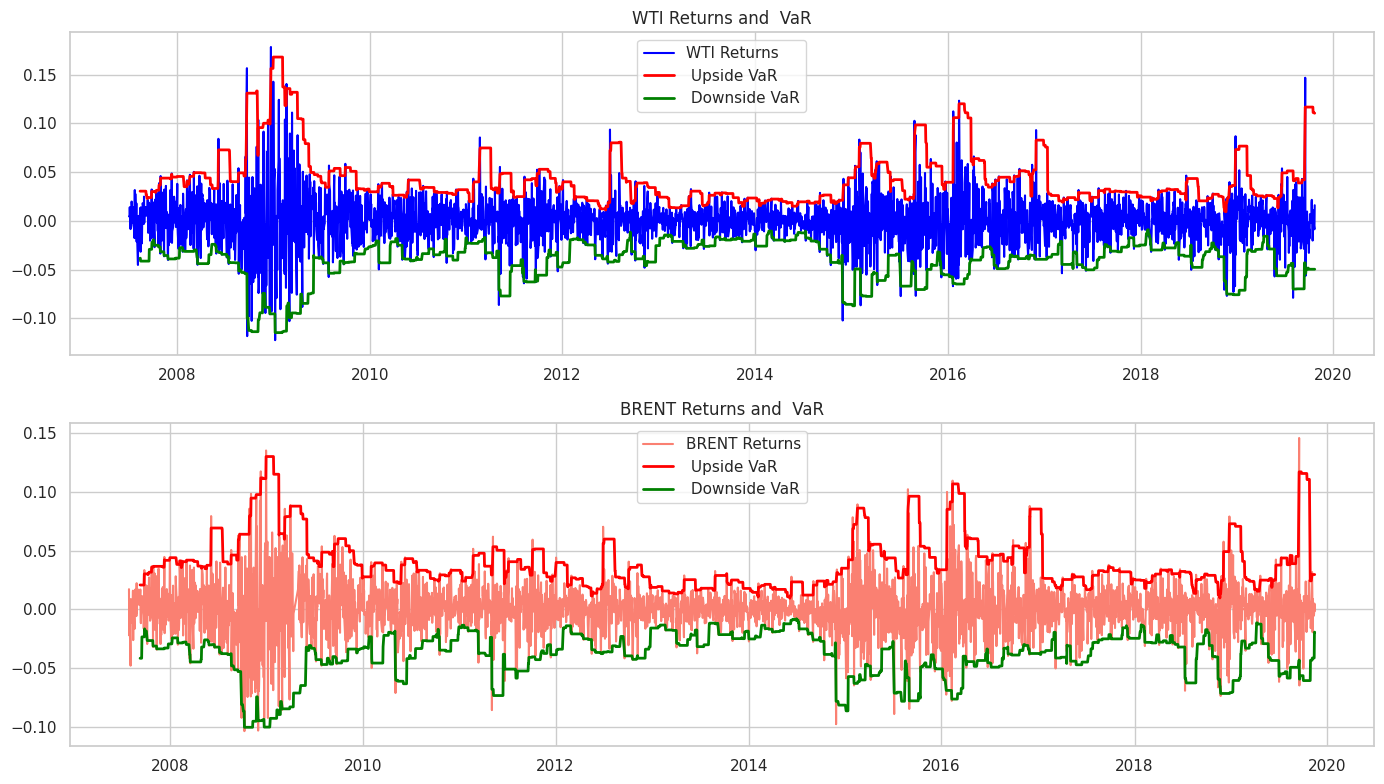

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(WTI_estimation_set, label='WTI Returns', color="blue")
plt.plot(rolling_var_upside_wti, label=' Upside VaR', color='red',  linewidth=2)
plt.plot(rolling_var_downside_wti, label=' Downside VaR', color='green',  linewidth=2)
plt.title('WTI Returns and  VaR')
plt.legend(loc="upper center")

plt.subplot(2, 1, 2)
plt.plot(BRENT_estimation_set, label='BRENT Returns', color="salmon")
plt.plot(rolling_var_upside_brent, label=' Upside VaR', color='red',  linewidth=2)
plt.plot(rolling_var_downside_brent, label=' Downside VaR', color='green',  linewidth=2)
plt.title('BRENT Returns and  VaR')
plt.legend(loc="upper center")

plt.tight_layout()
plt.show()

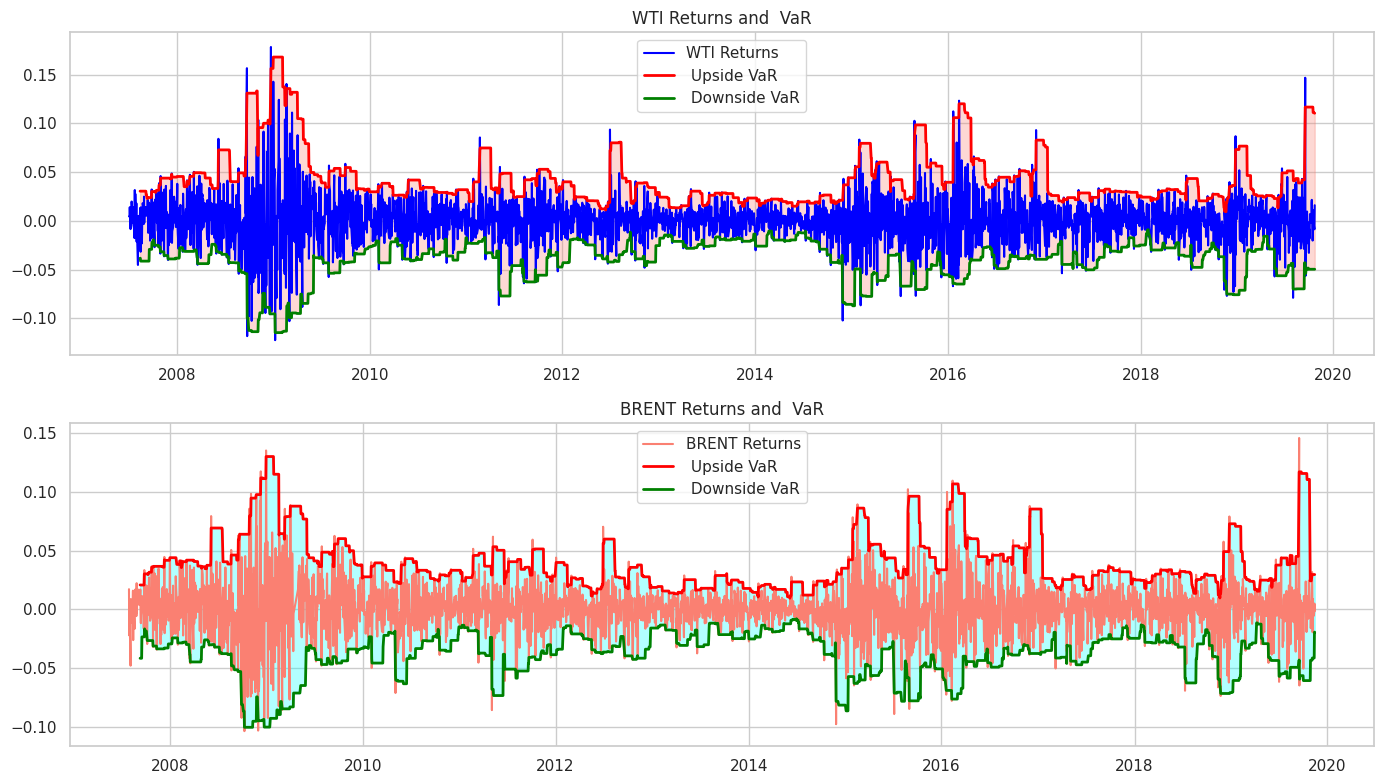

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(WTI_estimation_set, label='WTI Returns', color="blue")
plt.fill_between(WTI_estimation_set.index,rolling_var_upside_wti, rolling_var_downside_wti,color="salmon", alpha=0.3)
plt.plot(rolling_var_upside_wti, label=' Upside VaR', color='red',  linewidth=2)
plt.plot(rolling_var_downside_wti, label=' Downside VaR', color='green',  linewidth=2)
plt.title('WTI Returns and  VaR')
plt.legend(loc="upper center")

plt.subplot(2, 1, 2)
plt.plot(BRENT_estimation_set, label='BRENT Returns', color="salmon")
plt.fill_between(BRENT_estimation_set.index,rolling_var_upside_brent, rolling_var_downside_brent,color="cyan", alpha=0.3)
plt.plot(rolling_var_upside_brent, label=' Upside VaR', color='red',  linewidth=2)
plt.plot(rolling_var_downside_brent, label=' Downside VaR', color='green',  linewidth=2)
plt.title('BRENT Returns and  VaR')
plt.legend(loc="upper center")

plt.tight_layout()
plt.show()

In [ ]:
#Expected shortfall function
def calculate_es(returns, var_level):
    var_up = returns.rolling(window=window_size).quantile(1 - var_level)
    var_down = returns.rolling(window=window_size).quantile(var_level)

    es_up = returns[returns > var_up].rolling(window=window_size).mean()
    es_down = returns[returns < var_down].rolling(window=window_size).mean()

    return es_up, es_down

In [ ]:
window_size = 15
es_level = 0.01
es_WTI_est_up, es_WTI_est_down = calculate_es(WTI_estimation_set, es_level)
es_BRENT_est_up, es_BRENT_est_down = calculate_es(BRENT_estimation_set, es_level)

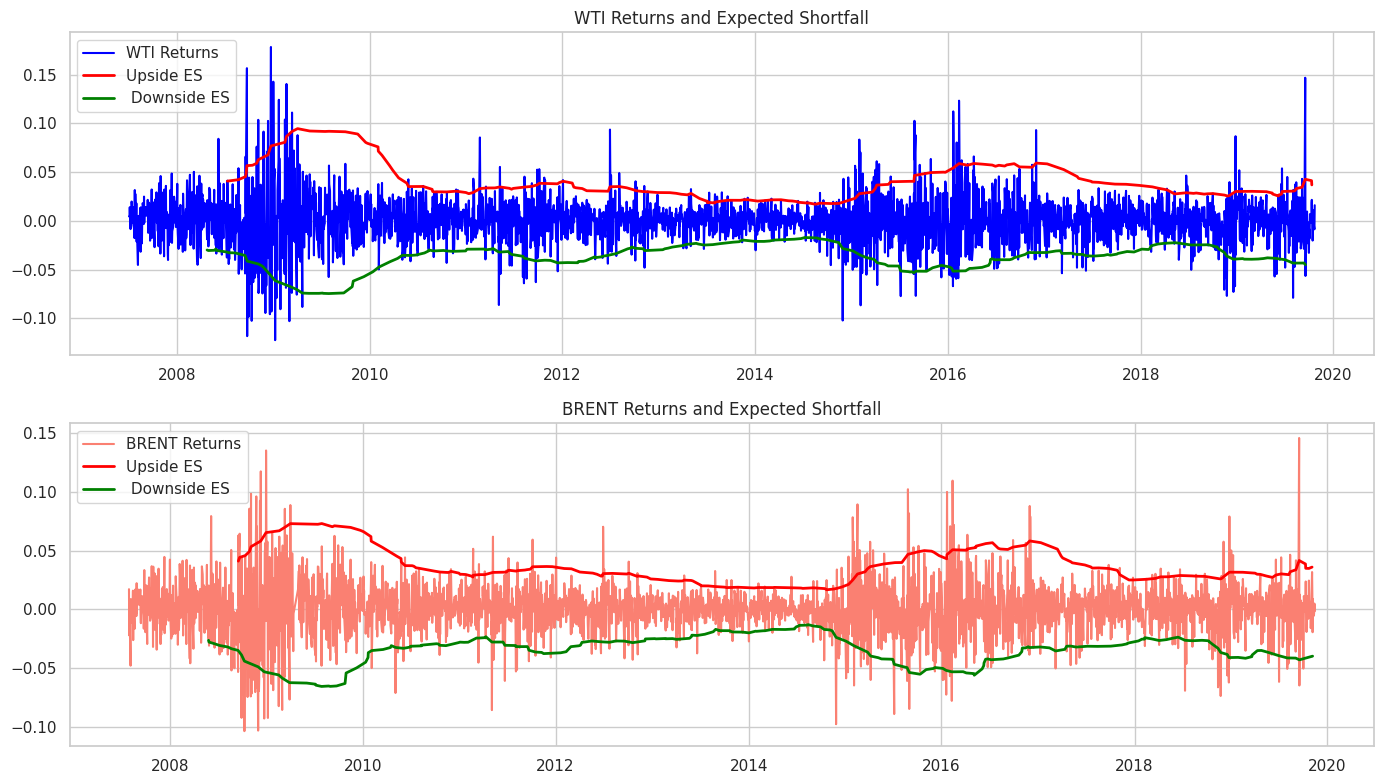

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(WTI_estimation_set, label='WTI Returns', color="blue")
plt.plot(es_WTI_est_up, label='Upside ES', color='red',  linewidth=2)
plt.plot(es_WTI_est_down, label=' Downside ES', color='green',  linewidth=2)
plt.title('WTI Returns and Expected Shortfall')
plt.legend()

# BRENT Returns and VaR plot
plt.subplot(2, 1, 2)
plt.plot(BRENT_estimation_set, label='BRENT Returns', color="salmon")
plt.plot(es_BRENT_est_up, label='Upside ES', color='red',  linewidth=2)
plt.plot(es_BRENT_est_down, label=' Downside ES', color='green',  linewidth=2)
plt.title('BRENT Returns and Expected Shortfall')
plt.legend()

plt.tight_layout()
plt.show()

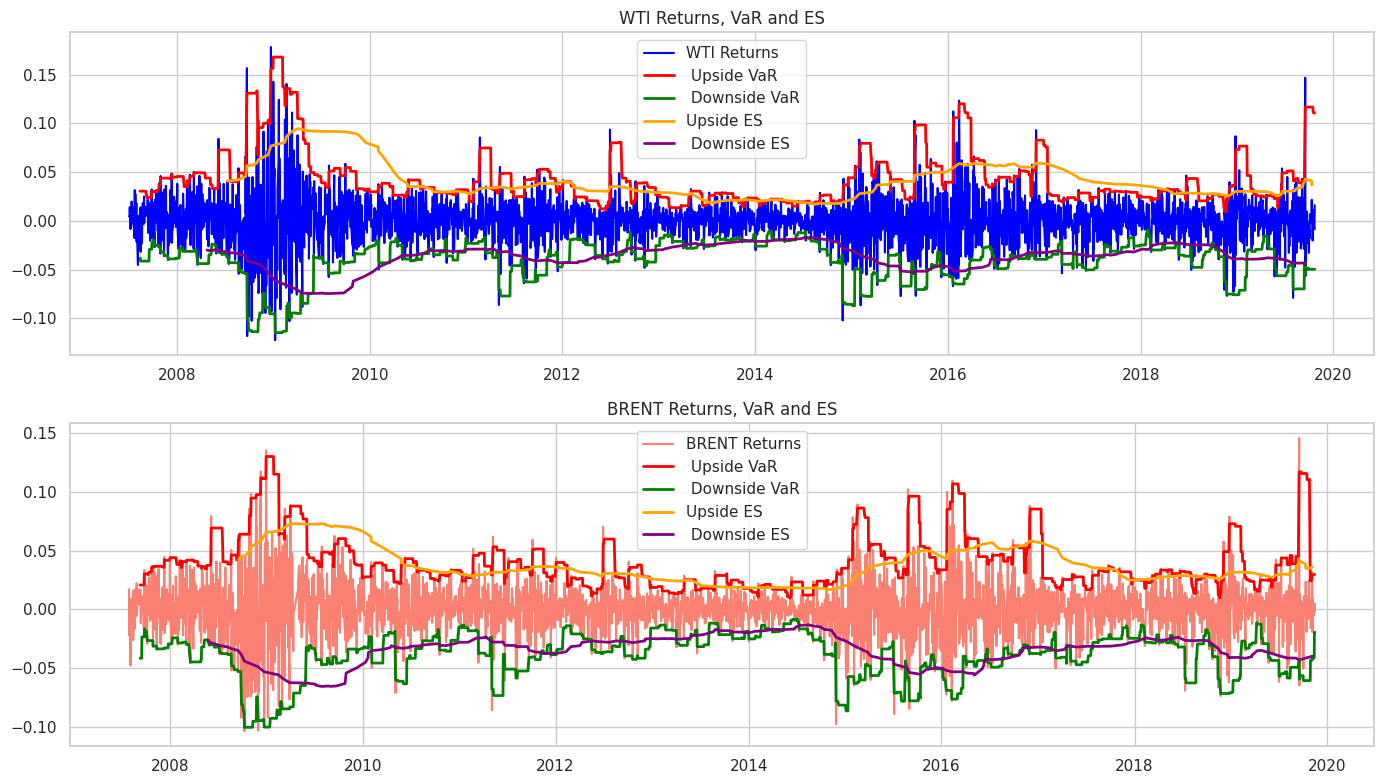

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(WTI_estimation_set, label='WTI Returns', color="blue")
plt.plot(rolling_var_upside_wti, label=' Upside VaR', color='red',  linewidth=2)
plt.plot(rolling_var_downside_wti, label=' Downside VaR', color='green',  linewidth=2)
plt.plot(es_WTI_est_up, label='Upside ES', color='orange',  linewidth=2)
plt.plot(es_WTI_est_down, label=' Downside ES', color='purple',  linewidth=2)
plt.title('WTI Returns, VaR and ES')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(BRENT_estimation_set, label='BRENT Returns', color="salmon")
plt.plot(rolling_var_upside_brent, label=' Upside VaR', color='red',  linewidth=2)
plt.plot(rolling_var_downside_brent, label=' Downside VaR', color='green',  linewidth=2)
plt.plot(es_BRENT_est_up, label='Upside ES', color='orange',  linewidth=2)
plt.plot(es_BRENT_est_down, label=' Downside ES', color='purple',  linewidth=2)
plt.title('BRENT Returns, VaR and ES')
plt.legend()

plt.tight_layout()
plt.show()

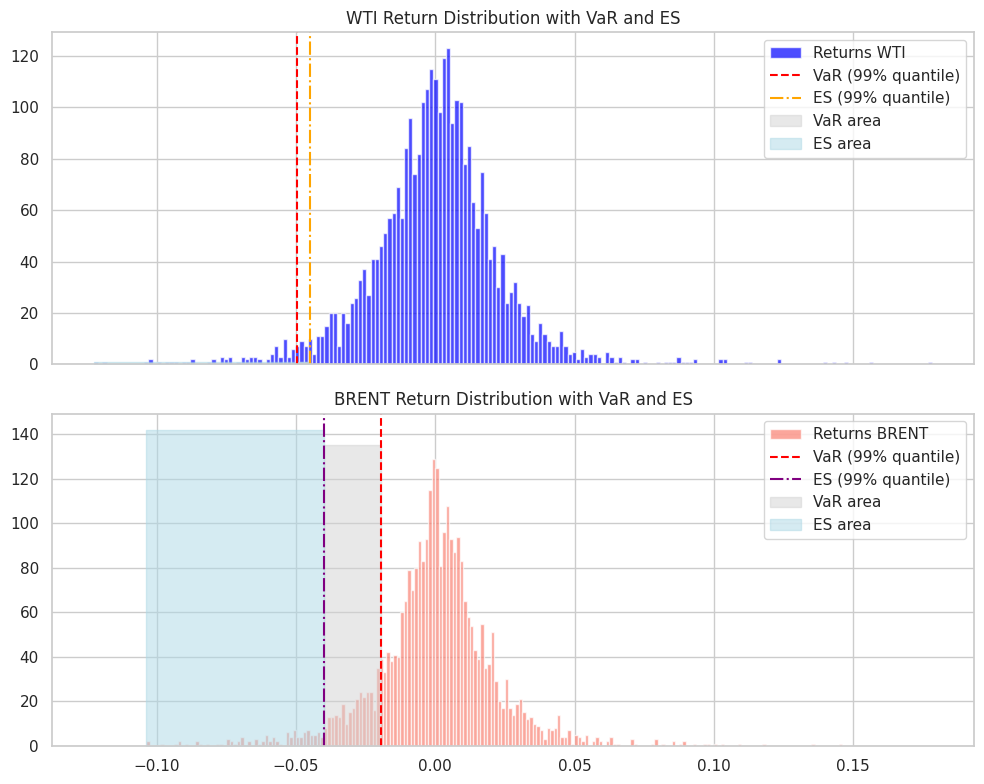

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

axs[0].hist(WTI_estimation_set, bins=200, alpha=0.7, color='blue', label='Returns WTI')
axs[0].axvline(x=rolling_var_downside_wti.iloc[-1], color='red', linestyle='--', label=f'VaR ({99:.0f}% quantile)')
axs[0].axvline(x=es_WTI_est_down.iloc[-1], color='orange', linestyle='-.', label=f'ES ({(1 - es_level) * 100:.0f}% quantile)')
axs[0].fill_betweenx(y=[0, plt.ylim()[1]], x1=rolling_var_downside_wti.iloc[-1], x2=es_WTI_est_down.iloc[-1], color='lightgray', alpha=0.5, label='VaR area')
axs[0].fill_betweenx(y=[0, plt.ylim()[1]], x1=WTI_estimation_set.min(), x2=es_WTI_est_down.iloc[-1], color='lightblue', alpha=0.5, label='ES area')
axs[0].set_title('WTI Return Distribution with VaR and ES')
axs[0].legend()

axs[1].hist(BRENT_estimation_set, bins=200, alpha=0.7, color='salmon', label='Returns BRENT')
axs[1].axvline(x=rolling_var_downside_brent.iloc[-1], color='red', linestyle='--', label=f'VaR ({99:.0f}% quantile)')
axs[1].axvline(x=es_BRENT_est_down.iloc[-1], color='purple', linestyle='-.', label=f'ES ({(1-es_level) * 100:.0f}% quantile)')
axs[1].fill_betweenx(y=[0, plt.ylim()[1]], x1=rolling_var_downside_brent.iloc[-1], x2=es_BRENT_est_down.iloc[-1], color='lightgray', alpha=0.5, label='VaR area')
axs[1].fill_betweenx(y=[0, plt.ylim()[1]], x1=BRENT_estimation_set.min(), x2=es_BRENT_est_down.iloc[-1], color='lightblue', alpha=0.5, label='ES area')
axs[1].set_title('BRENT Return Distribution with VaR and ES')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:

def rolling_var_forecast_up(returns, window_size, confidence_level_up=0.01):
    rolling_var_up = returns.rolling(window=window_size).std() * norm.ppf(confidence_level_up)
    return rolling_var_up.dropna()

def rolling_var_forecast_down(returns, window_size,confidence_level_down=0.99):
    rolling_var_down = returns.rolling(window=window_size).std() * norm.ppf(confidence_level_down)
    return rolling_var_down.dropna()



rolling_window_size = 50

WTI_rolling_var_99_up = rolling_var_forecast_up(WTI_forecast_set, rolling_window_size)

WTI_rolling_var_99_down = rolling_var_forecast_down(WTI_forecast_set, rolling_window_size)

BRENT_rolling_var_99_up = rolling_var_forecast_up(BRENT_forecast_set, rolling_window_size)

BRENT_rolling_var_99_down = rolling_var_forecast_down(BRENT_forecast_set, rolling_window_size)

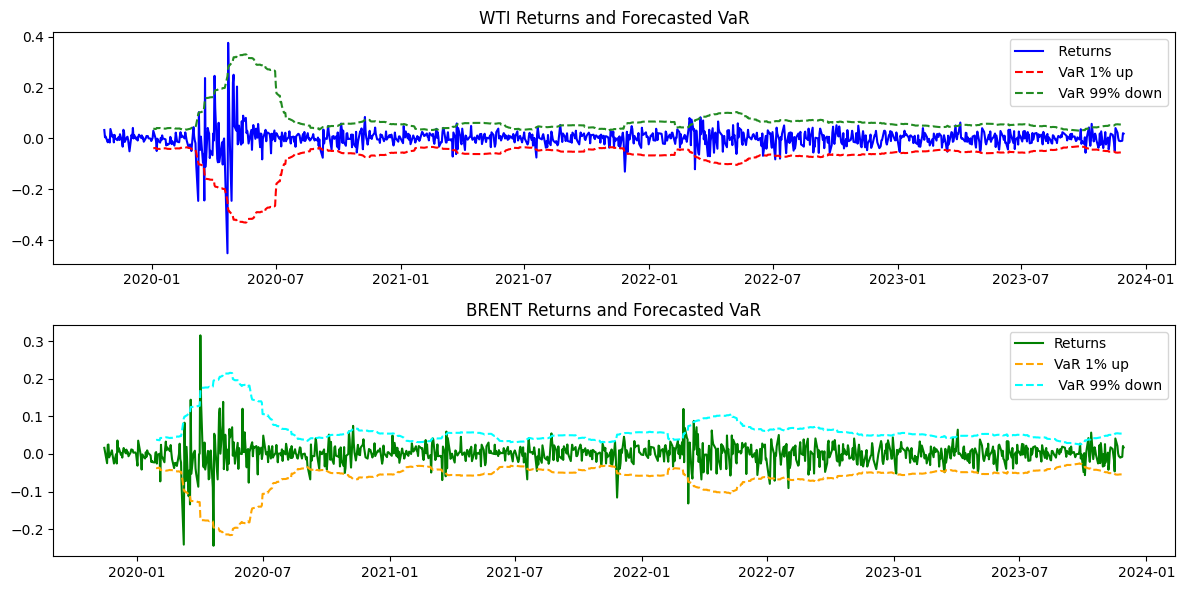

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(WTI_forecast_set, label=' Returns', color='blue')
plt.plot(WTI_rolling_var_99_up, label=' VaR 1% up', color='red', linestyle='dashed')
plt.plot(WTI_rolling_var_99_down, label=' VaR 99% down', color='forestgreen', linestyle='dashed')
plt.title('WTI Returns and Forecasted VaR')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(BRENT_forecast_set, label='Returns', color='green')
plt.plot(BRENT_rolling_var_99_up, label='VaR 1% up', color='orange', linestyle='dashed')
plt.plot(BRENT_rolling_var_99_down, label=' VaR 99% down', color='cyan', linestyle='dashed')
plt.title('BRENT Returns and Forecasted VaR')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
window_size = 15
es_level = 0.01
es_WTI_forecast_up, es_WTI_forecast_down = calculate_es(WTI_forecast_set, es_level)
es_BRENT_forecast_up, es_BRENT_forecast_down = calculate_es(BRENT_forecast_set, es_level)

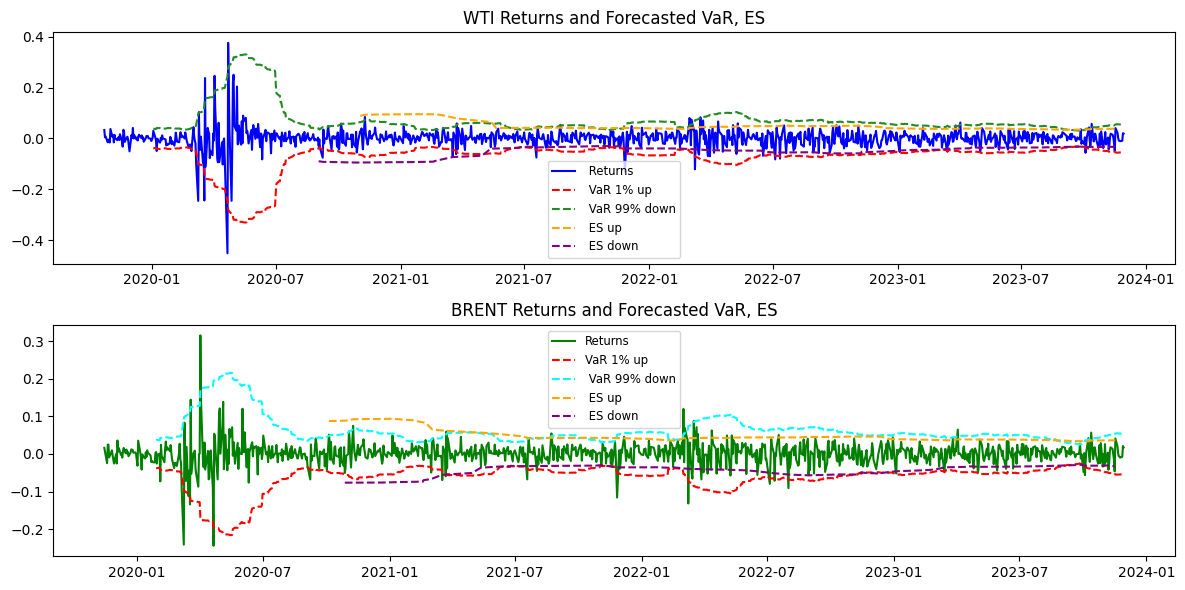

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(WTI_forecast_set, label=' Returns', color='blue')
plt.plot(WTI_rolling_var_99_up, label=' VaR 1% up', color='red', linestyle='dashed')
plt.plot(WTI_rolling_var_99_down, label=' VaR 99% down', color='forestgreen', linestyle='dashed')
plt.plot(es_WTI_forecast_up, label=' ES up', color='orange', linestyle='dashed')
plt.plot(es_WTI_forecast_down, label=' ES down', color='purple', linestyle='dashed')
plt.title('WTI Returns and Forecasted VaR, ES')
plt.legend(fontsize='small', loc= 'lower center')

plt.subplot(2, 1, 2)
plt.plot(BRENT_forecast_set, label='Returns', color='green')
plt.plot(BRENT_rolling_var_99_up, label='VaR 1% up', color='red', linestyle='dashed')
plt.plot(BRENT_rolling_var_99_down, label=' VaR 99% down', color='cyan', linestyle='dashed')
plt.plot(es_BRENT_forecast_up, label=' ES up', color='orange', linestyle='dashed')
plt.plot(es_BRENT_forecast_down, label=' ES down', color='purple', linestyle='dashed')
plt.title('BRENT Returns and Forecasted VaR, ES')
plt.legend(fontsize='small', loc= 'upper center')

plt.tight_layout()
plt.show()

In [ ]:
def calculate_statistics_var_ups(var_series, returns_series):

    mean_value = var_series.mean()
    std_deviation = var_series.std()
    max_value = var_series.max()
    min_value = var_series.min()

    failure_times = (var_series < returns_series).sum()

    rate_of_failure = failure_times / len(var_series)

    lr_statistic = np.log(rate_of_failure / (1 - rate_of_failure))

    return {
        'Mean': mean_value,
        'Standard Deviation': std_deviation,
        'Maximum': max_value,
        'Minimum': min_value,
        'Failure Time': failure_times,
        'Rate of Failure': rate_of_failure,
        'LR Statistic': lr_statistic
    }

In [ ]:
def calculate_statistics_var_dow(var_series,returns_series):

    mean_value = var_series.mean()
    std_deviation = var_series.std()
    max_value = var_series.max()
    min_value = var_series.min()

    failure_times = (var_series > returns_series).sum()

    rate_of_failure = failure_times / len(var_series)

    lr_statistic = np.log(rate_of_failure / (1 - rate_of_failure))

    return {
        'Mean': mean_value,
        'Standard Deviation': std_deviation,
        'Maximum': max_value,
        'Minimum': min_value,
        'Failure Time': failure_times,
        'Rate of Failure': rate_of_failure,
        'LR Statistic': lr_statistic
    }

In [ ]:
#WTI
statistics_upside_wti = calculate_statistics_var_ups(rolling_var_upside_wti, WTI_estimation_set)

statistics_downside_wti = calculate_statistics_var_dow(rolling_var_downside_wti, WTI_estimation_set)


#Brent
statistics_upside_brent = calculate_statistics_var_ups(rolling_var_upside_brent, BRENT_estimation_set)

statistics_downside_brent = calculate_statistics_var_dow(rolling_var_downside_brent, BRENT_estimation_set)


In [ ]:
print("Statistics for Upside VaR WTI:")
print(statistics_upside_wti)
print("\nStatistics for Downside VaR WTI:")
print(statistics_downside_wti)

Statistics for Upside VaR WTI:
{'Mean': 0.04341223367916693, 'Standard Deviation': 0.02818687119528334, 'Maximum': 0.16799965774881143, 'Minimum': 0.00935295848056783, 'Failure Time': 107, 'Rate of Failure': 0.03454956409428479, 'LR Statistic': -3.330199831922826}

Statistics for Downside VaR WTI:
{'Mean': -0.0416196299739163, 'Standard Deviation': 0.020641010794234676, 'Maximum': -0.009156551497573558, 'Minimum': -0.11475796474927971, 'Failure Time': 107, 'Rate of Failure': 0.03454956409428479, 'LR Statistic': -3.330199831922826}


In [ ]:
print("\nStatistics for Upside VaR Brent:")
print(statistics_upside_brent)
print("\nStatistics for Downside VaR Brent:")
print(statistics_downside_brent)


Statistics for Upside VaR Brent:
{'Mean': 0.04038557109594893, 'Standard Deviation': 0.0228230114011475, 'Maximum': 0.130328926003018, 'Minimum': 0.009618001236764788, 'Failure Time': 105, 'Rate of Failure': 0.03453947368421053, 'LR Statistic': -3.3305023821046733}

Statistics for Downside VaR Brent:
{'Mean': -0.039644910104518725, 'Standard Deviation': 0.01928628856849546, 'Maximum': -0.007900222638204127, 'Minimum': -0.10038735606451772, 'Failure Time': 99, 'Rate of Failure': 0.03256578947368421, 'LR Statistic': -3.3913850884194052}


In [ ]:
def rolling_var_forecast_up(returns, window_size, confidence_level_up=0.01):
    rolling_var_up = returns.rolling(window=window_size).std() * norm.ppf(confidence_level_up)
    return rolling_var_up.reindex(returns.index).dropna()

def rolling_var_forecast_down(returns, window_size, confidence_level_down=0.99):
    rolling_var_down = returns.rolling(window=window_size).std() * norm.ppf(confidence_level_down)
    return rolling_var_down.reindex(returns.index).dropna()

In [ ]:
def rolling_es_forecast(returns, window_size, var_level=0.99):
    var_forecast_up = rolling_var_forecast_up(returns, window_size, 1 - var_level)
    es_forecast_up = returns[returns.index.isin(var_forecast_up.index) & (returns > var_forecast_up)].rolling(window=window_size).mean()

    var_forecast_down = rolling_var_forecast_down(returns, window_size, var_level)
    es_forecast_down = returns[returns.index.isin(var_forecast_down.index) & (returns < var_forecast_down)].rolling(window=window_size).mean()

    return es_forecast_up, es_forecast_down

In [ ]:
Wti_var_forecast_up = rolling_var_forecast_up(WTI_forecast_set, window_size)
Wti_var_forecast_down = rolling_var_forecast_down(WTI_forecast_set, window_size)
Wti_es_forecast_up, Wti_es_forecast_down = rolling_es_forecast(WTI_forecast_set, window_size)

In [ ]:
from scipy.stats import norm

In [ ]:
def monte_carlo_var_forecast(returns, num_simulations, confidence_level=0.01):
    simulated_vars = []

    for _ in range(num_simulations):
        simulated_returns = np.random.normal(0, 1, len(returns)) * returns.std()
        simulated_var = np.percentile(simulated_returns, confidence_level * 100)
        simulated_vars.append(simulated_var)

    # Trim or pad the simulated variables to match the length of the original returns
    simulated_vars = simulated_vars[:len(returns)]

    return pd.Series(simulated_vars, index=returns.index)

# Specify the number of Monte Carlo simulations
num_simulations = 1000  # You can adjust this based on your preference

# Calculate Monte Carlo VaR for WTI
WTI_monte_carlo_var_99 = monte_carlo_var_forecast(WTI_forecast_set, num_simulations)

# Calculate Monte Carlo VaR for BRENT
BRENT_monte_carlo_var_99 = monte_carlo_var_forecast(BRENT_forecast_set, num_simulations)


ValueError: ignored